In [20]:
import tensorflow as tf
import numpy as np
import cv2 
from tensorflow import keras
import matplotlib.pyplot as plt


In [21]:
# Model / data parameters
num_classes = 10
input_shape = (20, 20, 1)

In [22]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = cv2.cvtColor(x_train,cv2.COLOR_BGR2GRAY)



error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 28


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation = "softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs =20)

Epoch 1/20


2022-10-28 21:18:00.989036: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2562 - accuracy: 0.9265
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1129 - accuracy: 0.9668
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0773 - accuracy: 0.9765
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0583 - accuracy: 0.9819
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0455 - accuracy: 0.9862
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0344 - accuracy: 0.9895
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0189 - accuracy: 0.9941
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.014

In [11]:
model.save("recognition")

INFO:tensorflow:Assets written to: recognition/assets


In [9]:
from keras.models import load_model

In [10]:
model = load_model("recognition")

1/1 [==============================] - 0s 74ms/step
9


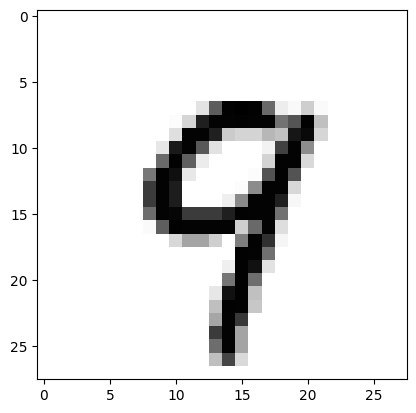

In [18]:
image_index =12
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


def makeSquare(not_square):
    
    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        
        if (height > width):
            pad = int((height - width)/2)
            
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,\
                                                   pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = int((width - height)/2)
            
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    
    return doublesize_square


def resize_to_pixel(dimensions, image):
    
    
    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    
    return ReSizedImg

In [ ]:
image = cv2.imread('./image/1.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Blur image then find 
#edges using Canny 
blurred = cv2.GaussianBlur(gray, (5,5),0)
edged = cv2.Canny(blurred, 30, 150)
plt.imshow(edged)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
full_number = []
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    
    
    #cv2.drawContours(image, contours, -1, (0,255,0), 3)
    #cv2.imshow("Contours", image)

    if w >=5  and h >=25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        squared = makeSquare(roi)
        final = resize_to_pixel(20, squared)
        final_array = final.reshape((1,400))
        final_array = final_array.astype(np.float32)
     
        cv2.waitKey(0)
    

In [ ]:
for digit in preprocessed_digits:    prediction = model.predict(final.reshape(1, 28, 28, 1))  
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
        hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))    print ("\n\n---------------------------------------\n\n")